## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20,100)

In [3]:
a = -1
b = 2

y = a*X+b

#### Plot your data points. 

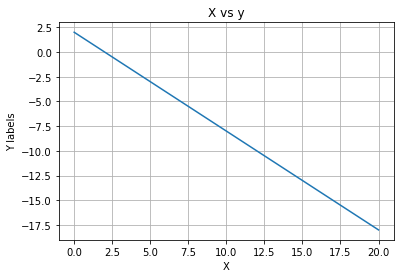

In [4]:
plt.grid()
plt.xlabel('X')
plt.ylabel('Y labels')
plt.title('X vs y')
plt.plot(X,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

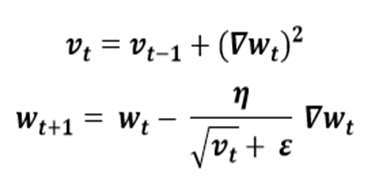

In [5]:
def Adagrad(X,y,lr,epsilon,iter):
    loss = []
    
    theta_0 = 0
    theta_1 = 0
    
    v0 = 0
    v1 = 0
    
    theta0_val = []
    theta1_val = []
    
    y_pred = []
    for i in range(iter):
        
        y_predict = theta_0+theta_1*X
        y_pred.append(y_predict)
        
        cost_fn = (1/(2*(len(X))))*np.sum((y_predict-y)**2)
        loss.append(cost_fn)

        grad_0 = (1/len(X))* np.sum((y_predict - y))
        grad_1 = (1/len(X))* np.sum((y_predict - y)*X)
        
        theta0_val.append(theta_0)
        theta1_val.append(theta_1)
        
        v0 += (grad_0)**2
        v1 += (grad_1)**2
        
        theta_0 -= ((lr)/(np.sqrt(v0)+epsilon))*grad_0
        theta_1 -= ((lr)/(np.sqrt(v1)+epsilon))*grad_1
        
    return theta0_val,theta1_val,loss,y_pred,theta_0,theta_1

In [30]:
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = Adagrad(X,y,0.01,1e-8,70000)
r2_score(y,y_pred[-1])

0.9915753626185928

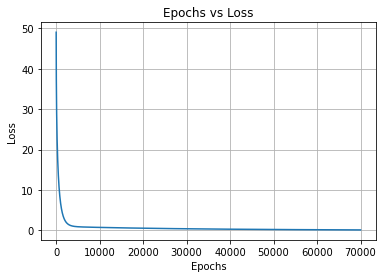

In [7]:
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.plot(np.arange(0,70000),loss)

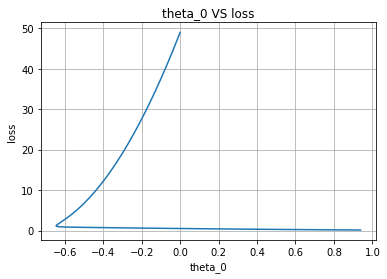

In [8]:
plt.grid()
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('theta_0 VS loss')
plt.plot(theta0_val, loss)

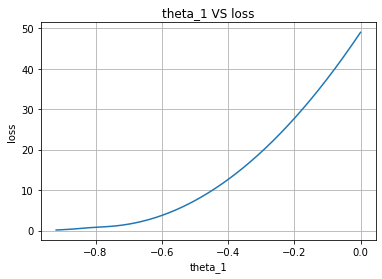

In [9]:
plt.grid()
plt.xlabel('theta_1')
plt.ylabel('loss')
plt.title('theta_1 VS loss')
plt.plot(theta1_val, loss)

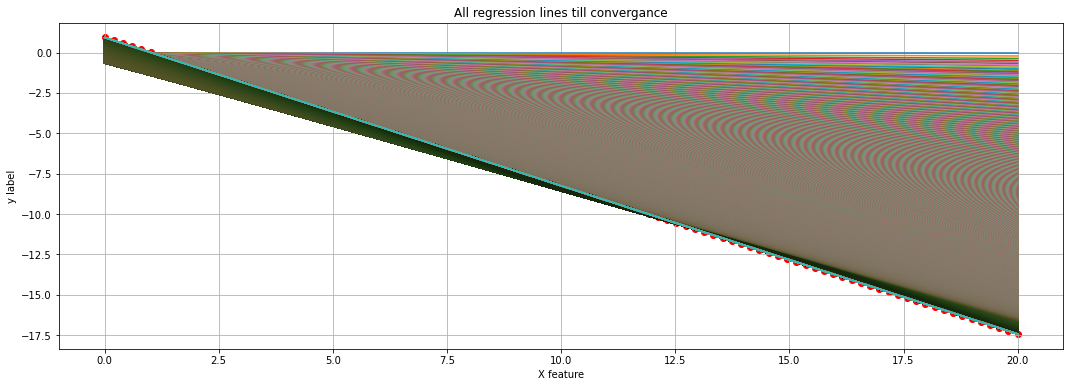

In [12]:
plt.figure(figsize=(18,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('All regression lines till convergance')
plt.scatter(X,y_pred[-1],c='r')
for i in range(70000):
    plt.plot(X,y_pred[i])

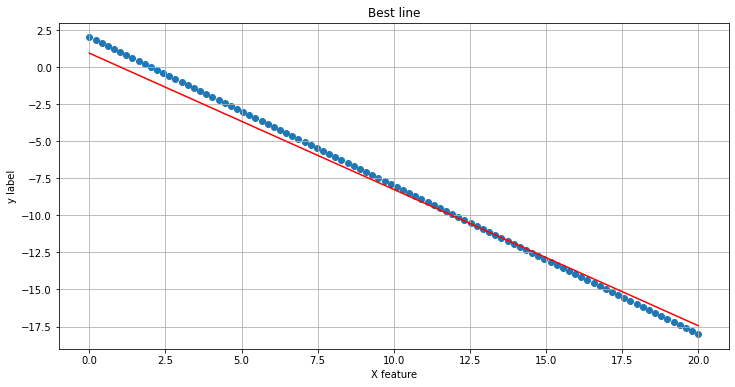

In [11]:
plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('Best line')
plt.scatter(X,y)
plt.plot(X, y_pred[-1],'r')

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

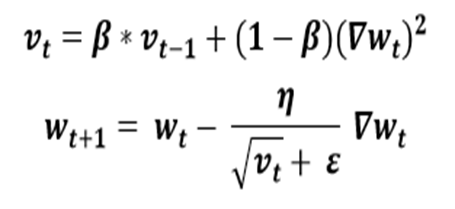

In [32]:
def RMSProp(X,y,lr,beta,epsilon,iter):
    loss = []
    
    theta_0 = 0
    theta_1 = 0
    
    v0 = 0
    v1 = 0
    
    theta0_val = []
    theta1_val = []
    
    y_pred = []
    for i in range(iter):
        
        y_predict = theta_0+theta_1*X
        y_pred.append(y_predict)
        
        cost_fn = (1/(2*(len(X))))*np.sum((y_predict-y)**2)
        loss.append(cost_fn)

        grad_0 = (1/len(X))* np.sum((y_predict - y))
        grad_1 = (1/len(X))* np.sum((y_predict - y)*X)
        
        theta0_val.append(theta_0)
        theta1_val.append(theta_1)
        
        v0 = beta*v0 + (1-beta)*(grad_0)**2
        v1 = beta*v1 + (1-beta)*(grad_1)**2
        
        theta_0 -= ((lr)/(np.sqrt(v0)+epsilon))*grad_0
        theta_1 -= ((lr)/(np.sqrt(v1)+epsilon))*grad_1
        
    return theta0_val,theta1_val,loss,y_pred,theta_0,theta_1

In [33]:
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = RMSProp(X,y,0.01,0.99,1e-8,400)
r2_score(y,y_pred[-1])

0.9943474541378245

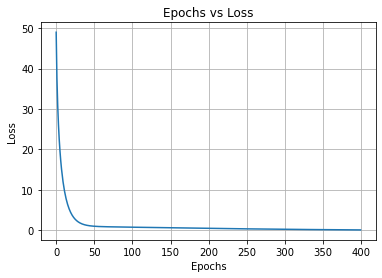

In [34]:
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.plot(np.arange(0,400),loss)

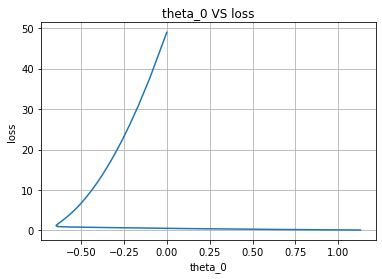

In [36]:
plt.grid()
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('theta_0 VS loss')
plt.plot(theta0_val, loss)

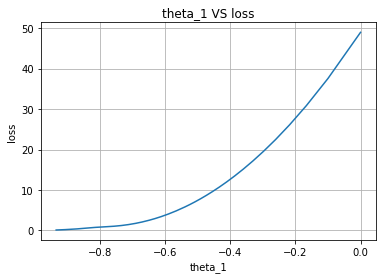

In [35]:
plt.grid()
plt.xlabel('theta_1')
plt.ylabel('loss')
plt.title('theta_1 VS loss')
plt.plot(theta1_val, loss)


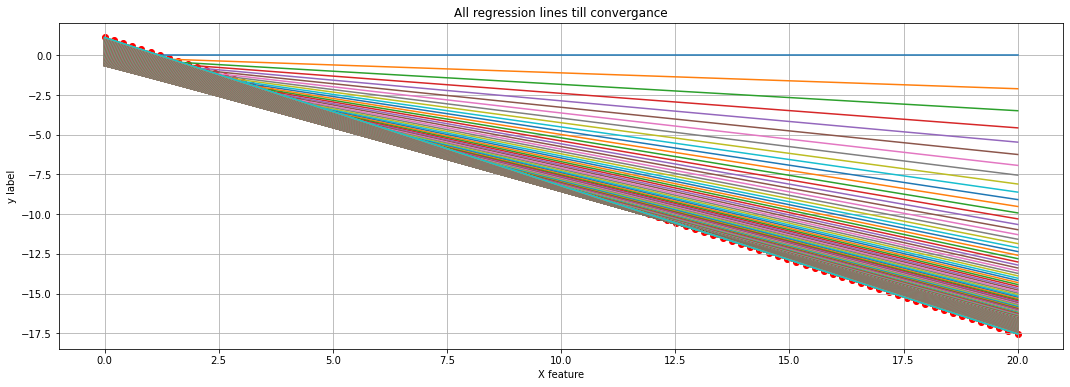

In [37]:
plt.figure(figsize=(18,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('All regression lines till convergance')
plt.scatter(X,y_pred[-1],c='r')
for i in range(400):
    plt.plot(X,y_pred[i])

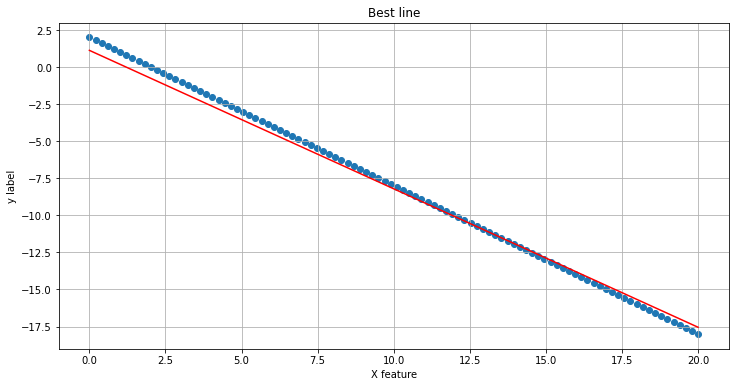

In [38]:
plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('Best line')
plt.scatter(X,y)
plt.plot(X, y_pred[-1],'r')

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

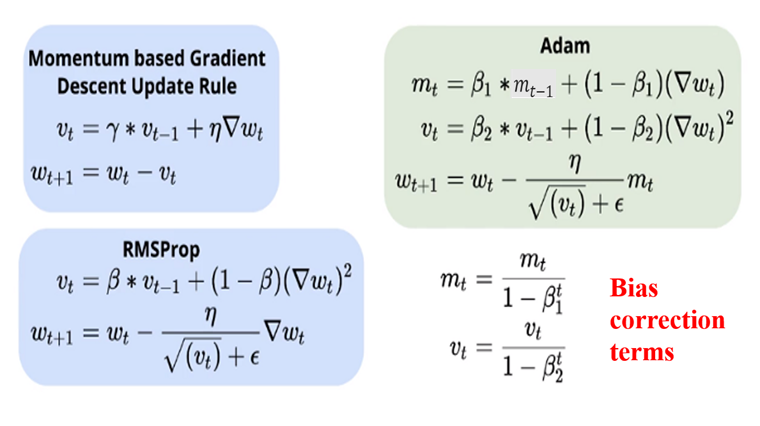

In [67]:
def Adam(X,y,lr,beta,epsilon,iter):
    loss = []
    
    theta_0 = 0
    theta_1 = 0
    
    v0 = 0
    v1 = 0
    
    m0 = 0
    m1 = 0
    
    theta0_val = []
    theta1_val = []
    
    y_pred = []
    for i in range(iter):
        
        y_predict = theta_0 + theta_1 * X
        y_pred.append(y_predict)
        
        cost_fn = ( 1/(2 * (len(X)) )) * np.sum((y_predict-y)**2)
        loss.append(cost_fn)

        grad_0 = (1/len(X)) * np.sum((y_predict - y))
        grad_1 = (1/len(X)) * np.sum((y_predict - y) * X)
        
        theta0_val.append(theta_0)
        theta1_val.append(theta_1)
        
        m0 = (beta * m0) + (1 - beta) * grad_0
        m1 = (beta * m1) + (1 - beta) * grad_1
        
        v0 = beta*v0 + (1-beta)*(grad_0)**2
        v1 = beta*v1 + (1-beta)*(grad_1)**2
        
        theta_0 -= ((lr)/(np.sqrt(v0)+epsilon))*m0
        theta_1 -= ((lr)/(np.sqrt(v1)+epsilon))*m1
        
    return theta0_val,theta1_val,loss,y_pred,theta_0,theta_1

In [74]:
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = Adam(X,y,0.01,0.9,1e-8,300)
r2_score(y,y_pred[-1])

0.9954852970357928

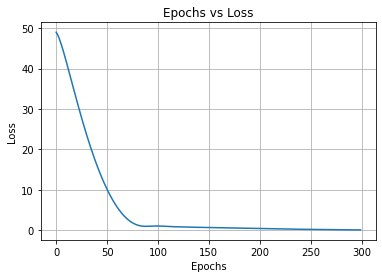

In [79]:
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.plot(np.arange(0,300),loss)

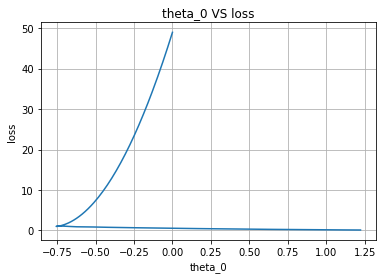

In [80]:
plt.grid()
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('theta_0 VS loss')
plt.plot(theta0_val, loss)


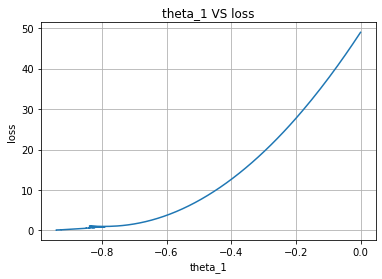

In [78]:
plt.grid()
plt.xlabel('theta_1')
plt.ylabel('loss')
plt.title('theta_1 VS loss')
plt.plot(theta1_val, loss)


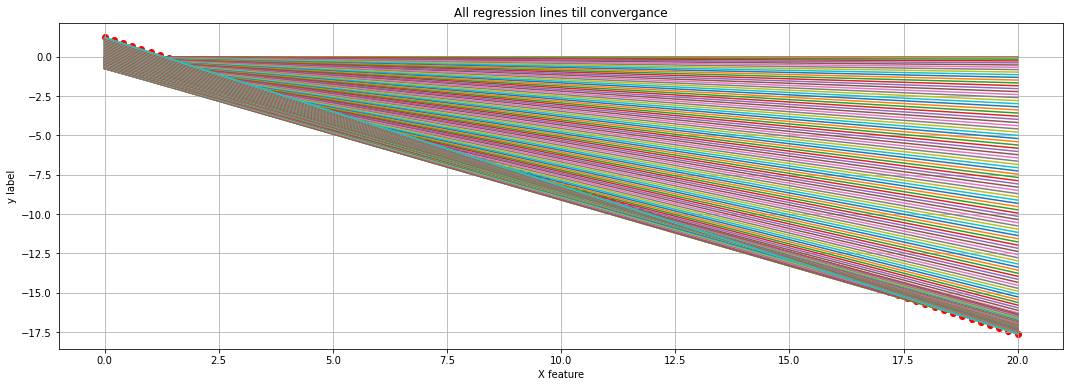

In [76]:
plt.figure(figsize=(18,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('All regression lines till convergance')
plt.scatter(X,y_pred[-1],c='r')
for i in range(300):
    plt.plot(X,y_pred[i])

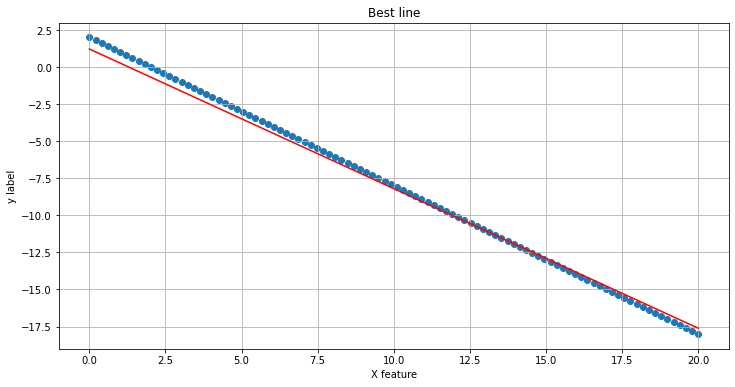

In [72]:
plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('Best line')
plt.scatter(X,y)
plt.plot(X, y_pred[-1],'r')

## Congratulations 
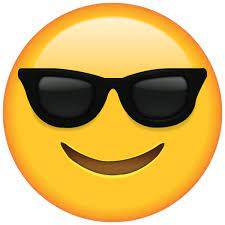